In [2]:
import sys
sys.path += ["../include/", "../"]
from images import *
import scipy.constants as sc

##### Load the data

In [3]:
x_group3, y_group3, i_group3, s_group3 = group_3(False)
x_num4, y_num4, i_num4, s_num4 = num_4(False)
x_bar, y_bar, i_bar, s_bar = smallest_bar(False)

ind_inbw_patt = [57, 35]
ind_inbw_bar = [30, 27]
ind_on_bar = [24, 19]

frep = 1e9
ppifg = 74180
center = ppifg // 2
Nyq_freq = frep * center
nu = np.linspace(0, Nyq_freq, center) + Nyq_freq * 2
wl = sc.c / nu * 1e6


In [4]:
wl_ll, wl_ul = 3.25, 3.6
ind_ll, ind_ul = np.argmin(abs(wl - wl_ul)), np.argmin(abs(wl - wl_ll))

abs_group3 = s_group3 / s_group3[0, 0]
abs_group3 = - np.log(abs_group3)
i_group3 = simps(abs_group3[:, :, ind_ll:ind_ul], axis=-1)
i_group3 -= i_group3.min()
i_group3 *= -1

abs_bar = s_bar / s_bar[0, 0]
abs_bar = - np.log(abs_bar)
i_bar = simps(abs_bar[:, :, ind_ll:ind_ul], axis=-1)
i_bar -= i_bar.min()
i_bar *= -1

abs_num4 = s_num4 / s_num4[0, 0]
abs_num4 = - np.log(abs_num4)
i_num4 = simps(abs_num4[:, :, ind_ll:ind_ul], axis=-1)
i_num4 -= i_num4.min()
i_num4 *= -1


In [6]:
cmap = 'cividis'


##### The plots below show the images taken on the smallest group that's on the airforce target. I imaged the smallest group at coarse 10 $\mu m$ resolution, and then did a finer below diffraction limit image of the smallest pattern that's on the silicon wafer. 

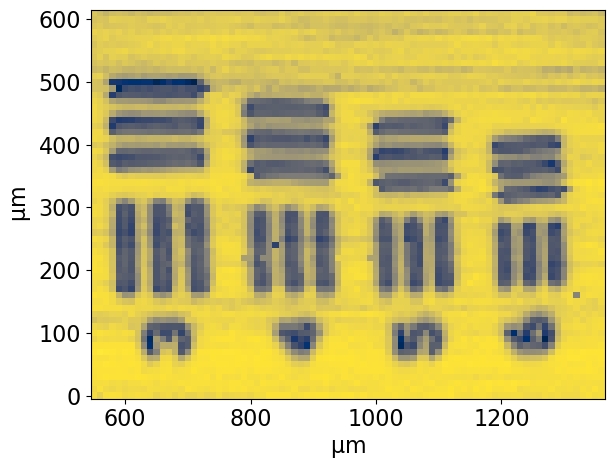

In [7]:
# group 3
x_group3_ = x_group3 - x_group3.min()
ind = np.argmin(abs(x_group3_ - 550))
fig, ax = plt.subplots(1, 1, dpi=100)
ax.pcolormesh(x_group3_[ind:], y_group3 - y_group3.min(), i_group3[:, ind:],
              cmap=cmap)
ax.set_xlabel("$\\mathrm{\\mu m}$")
ax.set_ylabel("$\\mathrm{\\mu m}$")
cr.square()

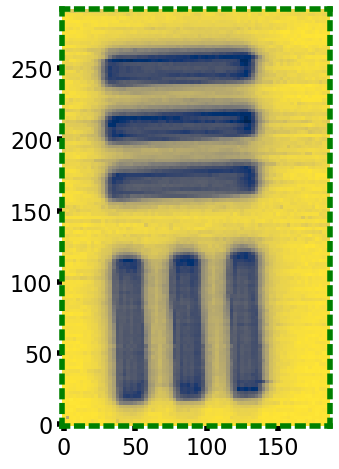

In [8]:
# smallest patterns in group 3
fig, ax = plt.subplots(1, 1)
for i in ['left', 'right', 'top', 'bottom']:
    ax.spines[i].set_linewidth(4)
    ax.spines[i].set_color('g')
    ax.spines[i].set_linestyle('dotted')
ax.tick_params(width=4)
ax.pcolormesh(x_bar - x_bar.min(), y_bar - y_bar.min(), i_bar, cmap=cmap)
cr.square()

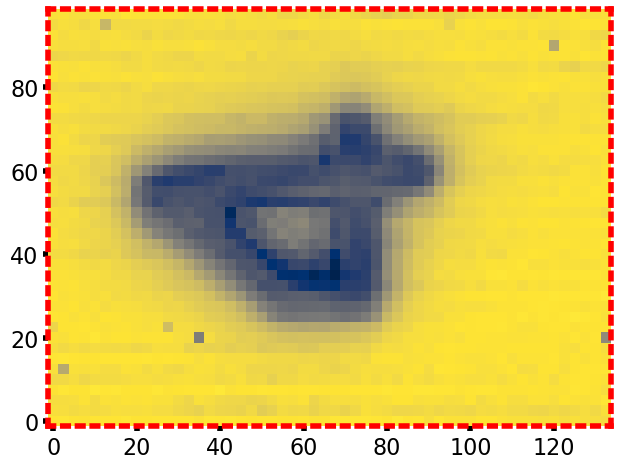

In [9]:
# number 4
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(x_num4 - x_num4.min(), y_num4 - y_num4.min(), i_num4, cmap=cmap)
for i in ['left', 'right', 'top', 'bottom']:
    ax.spines[i].set_linewidth(4)
    ax.spines[i].set_color('r')
    ax.spines[i].set_linestyle('dotted')
ax.tick_params(width=4)
cr.square()
